# Bootstrap

## 1. 

Generar 30 samples de una distribución Bernoulli de parámetro 𝑝 = 0.3.

In [42]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.3

samples = np.random.choice([0, 1], size=30, p=[1-p, p])

### a) 
Encontrar el estimador plug-in del desvío estándar 𝜎 de la distribución.

In [43]:
# el plug-in estimator es simplemente suponer que la distribucion observada es la real

# entonces la varianza poblacional = varianza muestral

# varianza muestral de una bernoulli

sigma_plug_in = np.std(samples) #np.sqrt(p*(1-p))

In [44]:
sigma_plug_in

0.3726779962499649

### b) 
Estimar su error estándar usando bootstrap

(array([  2.,   0.,   0.,  21.,   0.,  82., 318., 192., 273., 112.]),
 array([0.        , 0.04898979, 0.09797959, 0.14696938, 0.19595918,
        0.24494897, 0.29393877, 0.34292856, 0.39191836, 0.44090815,
        0.48989795]),
 <BarContainer object of 10 artists>)

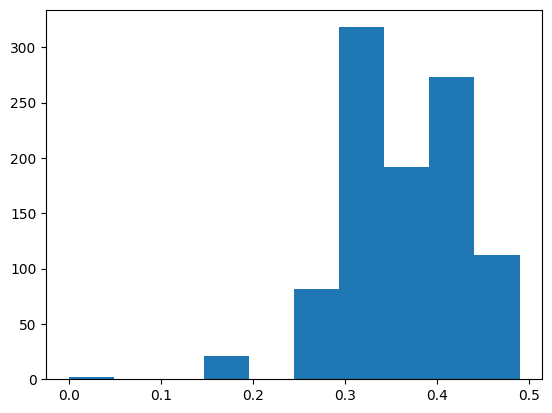

In [46]:
N = 1000
bootstrap_stds = np.zeros(N)
for i in range(N):
    draws = np.random.choice(samples, size= len(samples), replace=True)
    bootstrap_stds[i] = np.std(draws)
plt.hist(bootstrap_stds)

In [62]:
se_boot = np.std(bootstrap_stds)

print(f"error estandar: {se_boot}")

error estandar: 0.06509424356226115


### c) 
Encontrar un intervalo de confianza de nivel 0.95 usando los métodos normal, _percentile
bootstrap_, _basic bootstrap_ y _BCa_.

Usando _normal_:

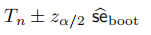

si la distribución no se asemeja a una normal puede ser poco preciso

In [63]:
from scipy.stats import norm

alpha = 0.05

z_alpha_2 = norm.ppf(1 - alpha/2)
lower_bound = sigma_plug_in - z_alpha_2 * se_boot
upper_bound = sigma_plug_in + z_alpha_2 * se_boot

print(f"intervalo de confianza: {lower_bound, upper_bound}")


intervalo de confianza: (0.24509562326705478, 0.500260369232875)


Usando _percentile bootstrap_

In [60]:
lower_bound = np.percentile(bootstrap_stds, alpha/2 * 100)
upper_bound = np.percentile(bootstrap_stds, 100 - alpha/2 * 100)

print(f"Intervalo de confianza: {lower_bound, upper_bound}")


Intervalo de confianza: (0.24944382578492943, 0.45825756949558394)


## 2.
Considerar los datasets de los precios anuales de las acciones de The Coca-Cola Company y las búsquedas en Google de “my cat scratched me”

In [3]:
array_1 = np.array([8,7.91667,19.8333,18.5833,29.0833,30.3333,35.4167,43.6667,37.25,45.75,47.1667,48.5,67.3333,79.3333,74.6667,85.6667,])
array_2 = np.array([30.73,22.7,28.58,32.94,35.08,36.99,41.12,42.26,42.34,41.5,45.91,46.94,55.32,54.27,58.82,63.56,])
array_1_name = "Google searches for 'my cat scratched me'"
array_2_name = "The Coca-Cola Company's stock price (KO)"

### a)
Encontrar el estimador plug-in del coeficiente de correlación entre ambos conjuntos de datos

Uso el coeficiente de correlacion de Pearson

$r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}$

In [8]:
mean_array_1 = np.mean(array_1)
mean_array_2 = np.mean(array_2)
covariance = np.mean((array_1 - mean_array_1) * (array_2 - mean_array_2))
std_array_1 = np.std(array_1)
std_array_2 = np.std(array_2)
correlation_coef = covariance / (std_array_1 * std_array_2)

print(correlation_coef)

0.9739712296818737


Es lo mismo que hacer:

In [68]:
from scipy import stats

stats.pearsonr(array_1, array_2)[0]

0.9739712296818737

In [38]:
np.corrcoef(array_1, array_2)[1,0]

0.9739712296818734

### b) 
Estimar su error estándar usando bootstrap.

In [64]:
N = 1000
bootstrap_r = np.zeros(N)

for i in range(N):
    draws_1 = np.random.choice(array_1, size= len(array_1), replace=True)
    draws_2 = np.random.choice(array_2, size= len(array_2), replace=True)
    bootstrap_r[i] = stats.pearsonr(draws_1, draws_2)[0]

se_r_estimado = np.std(bootstrap_r)

print(f"error estandar: {se_r_estimado}")

error estandar: 0.2615554204068617


(array([ 17.,  54., 116., 188., 216., 180., 131.,  69.,  23.,   6.]),
 array([-0.6834949 , -0.53554795, -0.38760099, -0.23965403, -0.09170707,
         0.05623988,  0.20418684,  0.3521338 ,  0.50008076,  0.64802772,
         0.79597467]),
 <BarContainer object of 10 artists>)

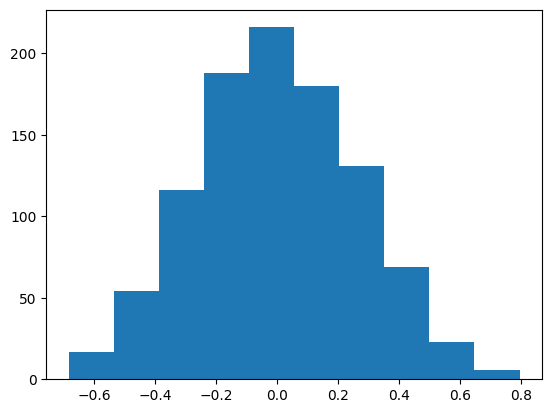

In [40]:
plt.hist(bootstrap_r)

### c) 
Encontrar un intervalo de confianza de nivel 0.95 usando los métodos normal, _percentile
bootstrap_, _basic bootstrap_ y _BCa_.

In [65]:
lower_bound = np.percentile(bootstrap_r, alpha/2 * 100)
upper_bound = np.percentile(bootstrap_r, 100 - alpha/2 * 100)

print(f"Intervalo de confianza: {lower_bound, upper_bound}")

Intervalo de confianza: (-0.5182995651515984, 0.5039133731679037)


????? no se que onda este punto

## 3.
Sean $X_1,.....,X_n$ variables aleatorias Normales($\mu$, 1). Sea $\theta = e^\mu$ y sea $\theta^* = e^{\bar{X}}$. Crear un conjunto de datos utilizando $\mu$ = 5 que tenga $n$ = 100 observaciones.

In [99]:
n = 100
X = np.random.normal(5, 1, n)

theta = np.exp(5)

theta_star = np.exp(X.mean()) # plugin estimate de theta (?

In [100]:
theta_star, theta

(151.5007064820516, 148.4131591025766)

In [101]:
N = 1000
bootstrap_theta = np.zeros(N)

for i in range(N):
    draws = np.random.choice(X, size= len(X), replace=True)
    bootstrap_theta[i] = np.exp(np.mean(draws))
se_boot = np.std(bootstrap_theta)
se_boot

15.721330470668859

(array([  6.,  26., 138., 219., 273., 178., 102.,  37.,  16.,   5.]),
 array([106.14433774, 116.3933438 , 126.64234985, 136.89135591,
        147.14036197, 157.38936803, 167.63837409, 177.88738015,
        188.1363862 , 198.38539226, 208.63439832]),
 <BarContainer object of 10 artists>)

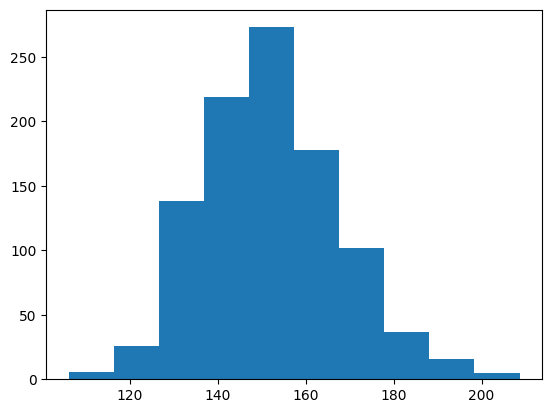

In [102]:
plt.hist(bootstrap_theta)

In [103]:
np.mean(bootstrap_theta)

152.08571164856758

In [104]:
alpha = 0.05

lower_bound = np.percentile(bootstrap_theta, alpha/2 * 100)
upper_bound = np.percentile(bootstrap_theta, 100 - alpha/2 * 100)

print(f"Intervalo de confianza: {lower_bound, upper_bound}")

Intervalo de confianza: (125.33527823952814, 184.8644059392734)


# Test de Hipótesis

### 4.
 En 1000 tiradas de moneda aparecen 560 caras y 440 cecas. ¿Es razonable suponer que la moneda es justa, es decir que la probabilidad de cara y de ceca son iguales?

$X \sim Bin(1000, 0.5)$

$H_0 : p = 0.5$  
$H_1 : p \neq 0.5$

In [41]:
from scipy.stats import norm

n = 1000
p = 0.5  # moneda justa

p_obs = 560/n

Z = (p_obs - p) / (np.sqrt((p*(1-p))/n)) # estadistico Z ~ N(0,1) (aprox)

alpha = 0.05

Z_critico = norm.ppf(1 - alpha / 2) # dos colas, si  hubiera una cola sería alpha

print(f"Región de NO rechazo: {-Z_critico, Z_critico}")

print(f"Z_observado: {Z}")



Región de NO rechazo: (-1.959963984540054, 1.959963984540054)
Z_observado: 3.7947331922020586


$Z_{obs}$ está en la Región de rechazo, entonces la moneda no está equilibrada

### 5.
Se desea determinar si un dado de seis caras está cargado o no. Para ello se arroja el dado
1000 veces obteniéndose los siguientes resultados:
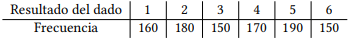  
Estamos interesados en testear las hipótesis $𝐻_0$: El dado es equilibrado vs. $H_1$: El dado está cargado.  
Para ello consideramos distintos tests:

#### a)
Sea 𝑋 = cantidad de veces que el resultado del dado es par. Plantear las hipótesis y determinar
la región de rechazo para un test de nivel aproximado 𝛼 = 0.05 basado en 𝑋. Para el conjunto
de datos obtenido, ¿cuál es el valor 𝑝 aproximado?, ¿cuál es la decisión?


$X \sim Bin(1000, 0.5)$


$H_0 : p = 0.5$  
$H_1 : p \neq 0.5$

In [10]:
x = 180 + 170 + 150 #cantidad de vaces que salio par
n = 1000
alpha = 0.05
p = 0.5 # dado justo

p_obs = x/n

print(f"valor p aproximado: {p_obs}")

Z = (p_obs - p) / np.sqrt(p*(1-p)/n)

print(f"valor del estadistico de prueba para un test de proporción: {Z}")

Z_critico = norm.ppf(1 - alpha / 2)

print(f"Región de NO rechazo: {-Z_critico, Z_critico}")

valor p aproximado: 0.5
valor del estadistico de prueba para un test de proporción: 0.0
Región de NO rechazo: (-1.959963984540054, 1.959963984540054)


$Z_{obs}$ no está en la Región de Rechazo, por lo tanto no rechazo la hipotesis inicial.  
No hacía falta hacer tanto, simplemente con ver que $p_{obs} = p$ alcanzaba para suponerlo

### b) 
Sea 𝑌 = cantidad de veces que el resultado del dado es menor o igual que 3. Plantear claramente las hipótesis y determinar la región de rechazo para un test de nivel aproximado
𝛼 = 0.05 basado en 𝑌.  
Para el conjunto de datos obtenido, ¿cuál es el valor 𝑝 aproximado?,
¿cuál es la decisión?


$Y \sim Bin(1000, 0.5)$


$H_0 : p = 0.5$  
$H_1 : p \neq 0.5$

In [11]:
y = 160 + 180 + 150

p_obs = y/n

print(f"valor p aproximado: {p_obs}")

Z = (p_obs - p) / np.sqrt(p*(1-p)/n)

print(f"valor del estadistico de prueba para un test de proporción: {Z}")

Z_critico = norm.ppf(1 - alpha / 2)

print(f"Región de NO rechazo: {-Z_critico, Z_critico}")

valor p aproximado: 0.49
valor del estadistico de prueba para un test de proporción: -0.6324555320336764
Región de NO rechazo: (-1.959963984540054, 1.959963984540054)


$Z_{obs}$ no está en la Región de Rechazo, por lo tanto no rechazo la hipotesis inicial.

### 6.
Sea $X$ una variable aleatoria normal de varianza conocida $\sigma^2$ y esperanza desconocida $\mu$. Se realiza un test que decide si rechazar o preservar la hipótesis $H_0 : \mu ≤ 0$ a partir de $n = 100$ muestras. Para cierto $c > 0$, el test dice “Dadas muestras $x_1,.....,x_n$, rechazar $H_0$ si $\bar{x}  > c$”.

#### a)
Encontrar el valor de $c$ para que el test tenga un nivel de 5%